   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


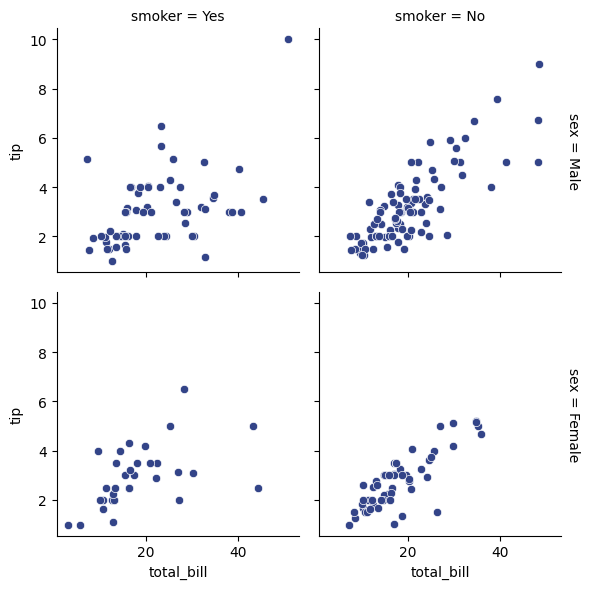

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tips = sns.load_dataset('tips')
print(tips.head())

# attend = sns.load_dataset("attention").query("subject <= 12")
# print(attend.head())    
grid = sns.FacetGrid(tips, col="smoker", row="sex",
                    #  col_wrap=4, 
                     height=3, # height of entire figure
                    #  ylim=(0, 10),
                     margin_titles=True)
grid.map(sns.scatterplot, "total_bill", "tip", color="#334488")
grid.figure.subplots_adjust(wspace=0.01, hspace=0.01)
grid.figure.tight_layout()

plt.show()

In [8]:
data_file = r"R:\H3D-sensor-test\mask_sweep_2024-06-26_ALL_DATA\mask_sweep_2024-06-26.csv"
# add parent directory to path
import sys
import os
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
sys.path.append(r"C:\Users\10552\OneDrive - Redlen Technologies\Code\spectrum-analyzer")

from data_handling_modules import TransformDf, ExtractModule, ExtractModuleStreamlit

bin_peak_input = 95
peak_halfwidth_input = 25

def parse_data(file_path_input):
    EM = ExtractModule(file_path_input)
    print(f"Number of lines in data file: {EM.count_lines()}")
    extracted_df_list = EM.extract_all_modules2df()

    TD = TransformDf()
    df_transformed_list = TD.transform_all_df(extracted_df_list)

    if bin_peak_input is not None and peak_halfwidth_input is not None:
        peak_halfwidth = peak_halfwidth_input
        df_transformed_list = TD.add_peak_counts_all(bin_peak_input, peak_halfwidth)

    x_positions = EM.extract_metadata_list(EM.csv_file, "stage_x_mm:")
    y_positions = EM.extract_metadata_list(EM.csv_file, "stage_y_mm:")
    heights = EM.extract_metadata_list(EM.csv_file, "height:")

    return (EM.number_of_modules, EM.n_pixels_x, EM.n_pixels_y, 
            x_positions, y_positions, heights, df_transformed_list)

N_MODULES, N_PIXELS_X, N_PIXELS_Y, x_positions, y_positions, heights, df_transformed_list = parse_data(data_file)

Number of lines in data file: 1367


,x_index,y_index,pixel_id,array_bins,total_count,total_counts_norm,is_edge,peak_count,non_peak_count
1,1,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",385,0.764,True,380,5
2,1,2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",354,0.702,True,353,1
3,1,3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",61,0.121,True,60,1
4,1,4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",311,0.617,True,309,2
5,1,5,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",148,0.294,True,145,3
